# 2. Probability Distributions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from distributions import Beta, Gaussian, StudentsT, GaussianMixture

## 2.1.1 The beta distributions
$${\rm Beta}(\mu|a,b) = {\Gamma(a+b)\over\Gamma(a)\Gamma(b)}\mu^{a-1}(1-\mu)^{b-1}$$

/Users/ryoito/machine_learning/PRML/distributions.py:85: RuntimeWarning: divide by zero encountered in power
  / sp.gamma(self.n_zeros))


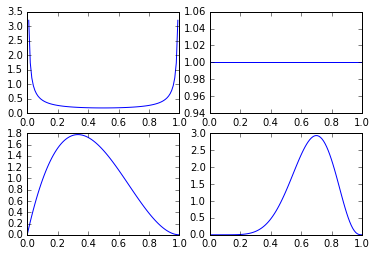

In [2]:
for i, [a, b] in enumerate([[0.1, 0.1], [1, 1], [2, 3], [8, 4]]):
    plt.subplot(2, 2, i + 1)
    beta = Beta(a, b)
    x = np.linspace(0, 1, 100)
    plt.plot(x, beta.predict_proba(x))
plt.show()

After observing $x=1$ for $m$ times and $x=0$ for $l$ times, the posterior distribution is
$$p(\mu|m,l,a,b) = {\Gamma(m+a+l+b)\over\Gamma(m+a)\Gamma(l+b)}\mu^{m+a-1}(1-\mu)^{l+b-1}$$

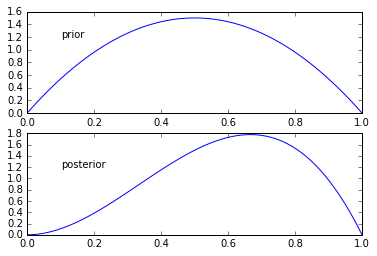

In [3]:
beta = Beta(2, 2)
plt.subplot(2, 1, 1)
plt.plot(x, beta.predict_proba(x))
plt.annotate("prior", (0.1, 1.2))

beta.fit(n_ones=1, n_zeros=0)
plt.subplot(2, 1, 2)
plt.plot(x, beta.predict_proba(x))
plt.annotate("posterior", (0.1, 1.2))
plt.show()

Predictive distribution of the random variable $x$ is
$$\begin{align}
p(x=1|m,l,a,b) &= \int_0^1 p(x=1|\mu)p(\mu|m,l,a,b){\rm d}\mu\\
&= {m+a\over m+a+l+b}
\end{align}$$

In [4]:
print("prediction of the model obtained by maximum likelihood estimation")
beta = Beta(0, 0)
beta.fit(n_ones=1)
for i in range(100):
    print(beta.predict(), end=" ")
print("")
print("prediction of the model obtained by bayesian estimation")
beta = Beta(2, 2)
beta.fit(n_ones=1)
for i in range(100):
    print(beta.predict(), end=" ")

prediction of the model obtained by maximum likelihood estimation
1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 
prediction of the model obtained by bayesian estimation
1 0 0 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 1 1 1 1 1 0 0 1 1 1 0 0 1 1 1 0 0 0 1 1 1 1 1 

## 2.3 The Gaussian Distribution
$$\mathcal{N}{\bf (x|\mu,\Sigma)} = {1\over(2\pi)^{D/2}}{1\over|\Sigma|^{1/2}}\exp\left\{-{1\over2}{\bf (x-\mu)^\top\Sigma^{\rm -1}(x-\mu)}\right\}$$

mean: [ 0.88628864  0.77562752]
var:
 [[ 4.3139858  -0.99263697]
 [-0.99263697  4.05700333]]


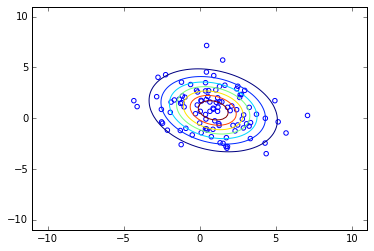

In [5]:
X = np.random.normal(loc=1., scale=2., size=(100, 2))
gaussian = Gaussian()
gaussian.fit(X)
print("mean:", gaussian.mean)
print("var:\n", gaussian.var)
x, y = np.meshgrid(
    np.linspace(-10, 10, 100), np.linspace(-10, 10, 100))
p = gaussian.predict_proba(
    np.array([x, y]).reshape(2, -1).T).reshape(100, 100)
plt.scatter(X[:, 0], X[:, 1], facecolor="none", edgecolor="b")
plt.contour(x, y, p)
plt.show()

## 2.3.7 Student's t-distribution
Student's t-distribution arises by marginalizing variance of a Gaussian distribution with Gamma distribution as a prior of the variance.
$$p(x|\mu,a,b) = \int_0^{\infty}\mathcal{N}(x|\mu,\tau^{-1}){\rm Gam}(\tau|a,b){\rm d}\tau$$
Student's t-distribution can be viewed as a mixture of gaussian distributions with various variances.
Maximum likelihood estimates of the parameters can be obtained by using EM algorithm with accuracy parameter as latent variable.

In the E step, we compute an expectation of accuracy for each input given parameters $\mu, a, b$
$$p(\tau_n|x_n,\mu,a,b) = \mathcal{N}(x_n|\mu,\tau^{-1}){\rm Gam}(\tau_n|a,b)/const.$$
$${\rm Gam}(\tau_n|a+{1\over2},b+{1\over2}(x_n-\mu)^2)$$
$$\tau_n={a+{1\over2}\over b+{1\over2}(x_n-\mu)^2}$$

M step maximizes the likelihood of the parameters given complete-data $\{x_n,\tau_n\}_{n=1}^N$. The log likelihood function is
$$\sum_{n=1}^N\ln p(x_i,\tau_i|\mu,a,b)=\sum_{n=1}^N\ln\{\mathcal{N}(x_i|\mu,\tau_i^{-1}){\rm Gam}(\tau_i|a,b)\}$$
Removing terms that are not related to the parameters, we have
$$-{1\over2}\sum_n\tau_n(x_n-\mu)^2 + aN\ln b - N\ln\Gamma(a) + a\sum_n\ln\tau_n - b\sum_n\tau_n,$$
and obtain parameters by maximizing the above function.

Maximum likelihood estimates can be obtained by first initializing the parameters and then repeating E and M steps alternatively.

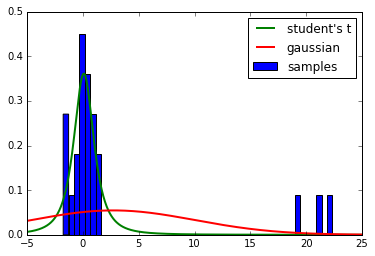

In [6]:
x = np.random.normal(size=20)
x = np.concatenate([x, np.random.normal(loc=20., size=3)])
plt.hist(x, bins=50, normed=1., label="samples")

students_t = StudentsT()
gaussian = Gaussian()

gaussian.fit(x)
students_t.fit(x)

x = np.linspace(-5, 25, 1000)
plt.plot(x, students_t.predict_proba(x), label="student's t", linewidth=2)
plt.plot(x, gaussian.predict_proba(x), label="gaussian", linewidth=2)
plt.legend()
plt.show()

## 2.3.9 Mixture of Gaussians
$$p({\bf x}) = \sum_{k=1}^K\pi_k\mathcal{N}{\bf (x|\mu_k,\Sigma_k)}$$
where $\pi_k$ are mixing coefficients whose sum equals to 1.

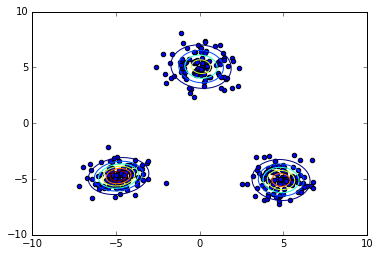

In [7]:
x1 = np.random.normal(size=(100, 2))
x1 += np.array([-5, -5])
x2 = np.random.normal(size=(100, 2))
x2 += np.array([5, -5])
x3 = np.random.normal(size=(100, 2))
x3 += np.array([0, 5])
X = np.vstack((x1, x2, x3))

model = GaussianMixture(3)
model.fit(X, iter_max=100)

x_test, y_test = np.meshgrid(np.linspace(-10, 10, 100), np.linspace(-10, 10, 100))
X_test = np.array([x_test, y_test]).reshape(2, -1).transpose()
probs = model.predict_proba(X_test)
Probs = probs.reshape(100, 100)
plt.scatter(X[:, 0], X[:, 1])
plt.contour(x_test, y_test, Probs)
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.show()